# Workflow Notebook Canvas-Nbgrader

### Eisen:
* Voor de plagiaat test is het noodzakelijk dit notebook te runnen op Linux of Mac. De rest is geschikt voor Windows.
* Dit notebook moet in de map staan van het vak, dus naast de folders source, release etc. Jupyter moet ook opgestart worden in die map.
* Only use one notebook per assignment, and give the notebook and assignment the same name.

## Start

In [1]:
%matplotlib inline
import urllib.request

from ipywidgets import (Button, Layout, fixed, interact, interact_manual,
                        interactive, widgets)

# urllib.request.urlretrieve(
#      "https://raw.githubusercontent.com/jaspervdh96/Workflow/master/Workflow_functies.ipynb",
#      "Workflow_functies.ipynb")
%run Workflow_functies.py
course = Course()

## Instellingen

## Adding the students to the nbgrader database

In [2]:
db_button = Button(
    description="Update the students in the database",
    layout=Layout(width='300px'))
db_button.on_click(course.update_db)
db_button

Button(description='Update the students in the database', layout=Layout(width='300px'), style=ButtonStyle())

# Assign Assignment
Will update the assignment file, create a student version and update the assignment in the Database.

Will also create the assignment on Canvas if it does not yet exist. It will automatically set the maximum points to 10. It however does not create the deadline, this should be done manually!

In [3]:
interact_assign = interact_manual.options(
    manual_name="Assign de assignment in de database")

interact_assign(
    course.assign,
    assignment_id=course.nbgrader_assignments());


interactive(children=(Dropdown(description='assignment_id', options=('AssignmentWeek1', 'AssignmentWeek2', 'As…

# Downloading and sorting files
This cell wil automatically download all submissions affiliated with this assignment from Canvas, and sort them for nbgrader. 

If the files do not have to be downloaded from Canvas (for example exams in testvision), put them in the folder `downloaded/{assignment name}/archive`. It will nevertheless sort them then.


In [4]:
interact_manual(
    course.download_files, assignment_id=course.nbgrader_assignments());

interactive(children=(Dropdown(description='assignment_id', options=('AssignmentWeek1', 'AssignmentWeek2', 'As…

# Autograding

In [5]:
interact_manual(
    course.autograde,assignment_id=course.nbgrader_assignments());

interactive(children=(Dropdown(description='assignment_id', options=('AssignmentWeek1', 'AssignmentWeek2', 'As…

# Plagiaat
Onderstaande cells:
* converten alle notebooks tot python files
* creeert een rapport van de plagiaattest

In [6]:
interact_plagiat = interact_manual.options(manual_name="Check op plagiaat")
interact_plagiat(
    course.plagiatcheck,
    assignment_id=course.nbgrader_assignments());

interactive(children=(Dropdown(description='assignment_id', options=('AssignmentWeek1', 'AssignmentWeek2', 'As…

# Visualisations

## Distribution of the grades
The interval is always `[begin, end)`, except for `[9.5,10.0]`

In [7]:
interact(
    course.interact_grades,
    assignment_id=course.graded_submissions());

interactive(children=(Dropdown(description='assignment_id', options=('AssignmentWeek1', 'AssignmentWeek2', 'As…

## Item analysis

### P value

### Rir value
The Rit value represents the distinctive character of an item and represents the correlation (often indicated with the letter R) between the item and the total score on the test (Rit).

The total score on a test also contains the score on the item with which you want to correlate. That distorts the correlation in a rosy way. The Rir value therefore indicates the correlation (R) between the item and the total score minus the score for the question in question (residual value). This is the Rir value. In this way a fairer representation is given of the distinctive character of an item.

A question has a high distinctive character (Rir more than 0.25) if students with a high score make up for the question and the students with a low score make a mistake. The item then differs between students who perform well and students who do not perform as well. If students of all levels score the same on a question, there is no distinctive character (Rir is 0). If low-scoring students have the right question and high-scoring students are not (Rir is negative), then something is probably wrong, such as an incorrect key or an unclear formulation of the assignment.

In [8]:
interact(
    course.question_visualizations, assignment_id=course.graded_submissions());

interactive(children=(Dropdown(description='assignment_id', options=('AssignmentWeek1', 'AssignmentWeek2', 'As…

## Statistics
### Cronbachs Alpha
The standard for the reliability of an exam depends on the purpose of the exam. If the exam is intended to determine the suitability of a student, a reliability of 0.80 or higher is desirable. This applies if all examinations have to be passed with a pass and compensation is not possible. When it comes to formative tests that only support learning, a reliability of 0.60 is sufficient. This is also the case with a compensatory examination regulation.

A number of comments can be made about reliability as an indicator of the quality of an exam:
*    The reliability is lower as the exam is more heterogeneous, ie it measures different types of knowledge and skills;
*    The reliability becomes lower the more homogeneous the group of students, ie when the differences in level of students are small. This can be determined by the difference in scores between the 5% best and 5% worst students.
*    The ratio for reliability is the lowest lower limit. In reality, the reliability can be higher.
*    Reliability increases if the exam contains more items.

Bron: http://toetsing.uva.nl/toetscyclus/analyseren/tentamenanalyse/tentamenanalyse.html

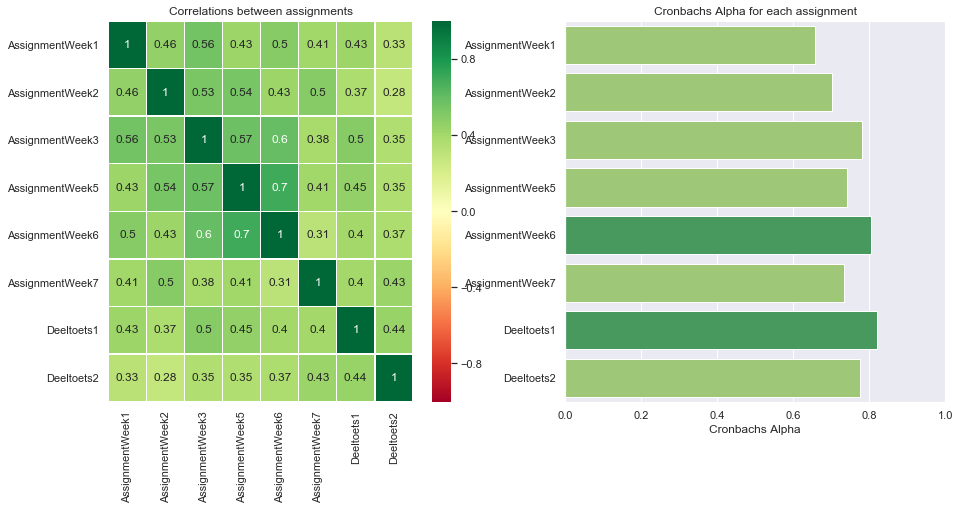

In [9]:
course.visualize_validity()

## Overview of the course

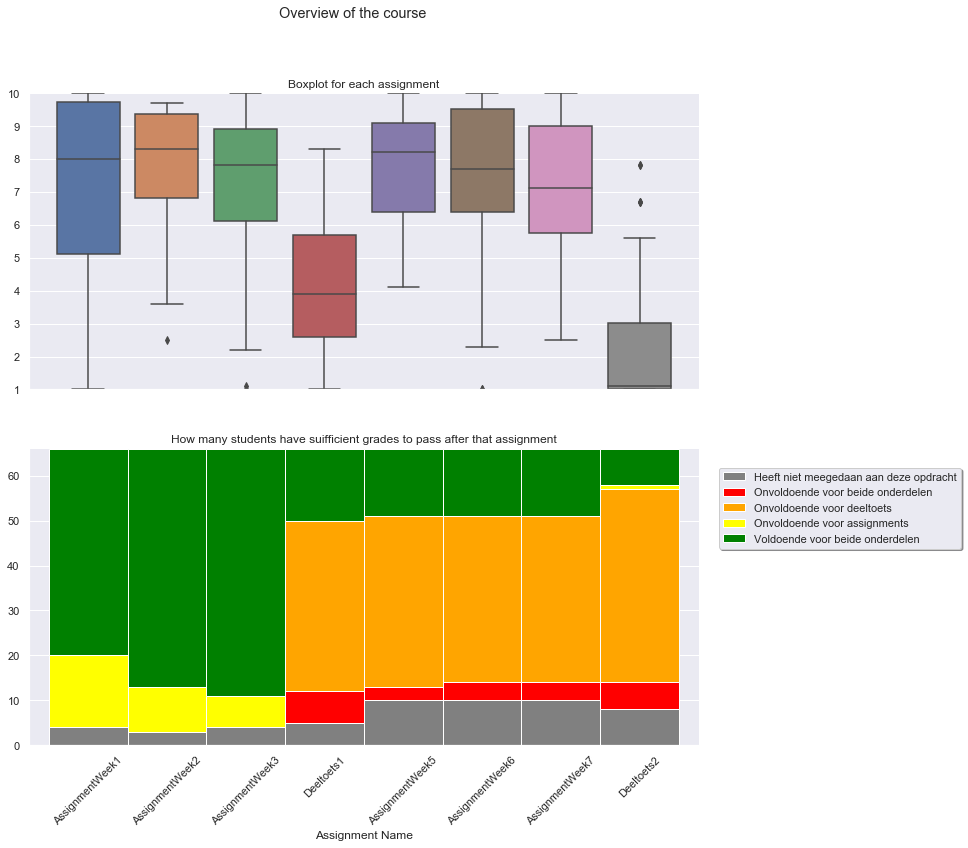

In [10]:
course.visualize_overview()

# Upload to Canvas
This will upload the grades to canvas. It will not fill in anything if there's no grade in nbgrader. Nor will it change grade 0 on Canvas.


## Feedback
If you select `feedback`, a [feedback page](https://nbgrader.readthedocs.io/en/0.2.x/user_guide/06_returning_feedback.html) will be uploaded to the submission on Canvas. This excludes the hidden tests and the traceback of errors/asserts. The traceback is excluded because often a part of the hidden tests is visible in it.

In [11]:
course.upload_button()

interactive(children=(Dropdown(description='assignment_name', options=('AssignmentWeek1', 'AssignmentWeek2', '…

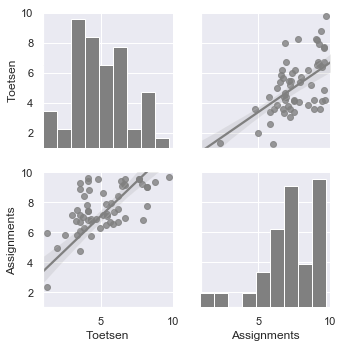

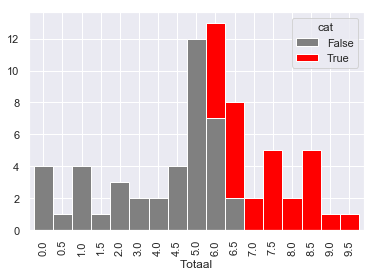

In [12]:
course.final_grades()